In [1]:
import os
import numpy as np
import glob as glob
import pandas as pd
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math

In [2]:
read_data = pd.read_hdf(Path(r'\\mpfi.org\public\sb-lab\Ballsystem_LegKinematics_DataStructures\P9_BPN\alldata_V4.h5'))
display(read_data)

,Genotype,no. of flies,flydata
0,BPN,10,flynum tnum fnum SF R-F-ThC_x R-...
1,P9LT,12,flynum tnum fnum SF R-F-ThC_x R-...
2,P9RT,13,flynum tnum fnum SF R-F-ThC_x R...


# BPN

In [5]:
%matplotlib inline
BPN = read_data["flydata"].iloc[0]
BPN

,flynum,tnum,fnum,SF,R-F-ThC_x,R-F-ThC_y,R-F-ThC_z,R-F-CTr_x,R-F-CTr_y,R-F-CTr_z,...,R3D_flex,x_vel,y_vel,z_vel,L1_stepcycle,L2_stepcycle,L3_stepcycle,R1_stepcycle,R2_stepcycle,R3_stepcycle
0,1,1,0,50,0.722112,0.281429,98.489155,0.432083,0.549926,98.435096,...,149.009534,-4.119760,9.935891,1.599356,True,True,True,True,True,True
1,1,1,1,50,0.722731,0.281195,98.488857,0.433364,0.550268,98.434786,...,149.499058,-2.841413,6.852820,1.103082,True,True,True,True,True,True
2,1,1,2,50,0.723571,0.281136,98.488311,0.433688,0.549821,98.435088,...,149.637803,-1.835076,4.425773,0.712406,True,True,True,True,True,True
3,1,1,3,50,0.724446,0.281164,98.487653,0.433201,0.548740,98.435875,...,149.387369,-1.224062,2.952149,0.475200,True,True,True,True,True,True
4,1,1,4,50,0.725058,0.281141,98.487097,0.432576,0.547608,98.436700,...,148.737145,-0.931334,2.246160,0.361559,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125995,10,10,13995,66,0.770194,0.254956,98.616256,0.523114,0.532041,98.454874,...,151.987281,0.000000,0.000000,-0.043973,True,True,True,True,True,True
125996,10,10,13996,66,0.770224,0.254917,98.616413,0.523267,0.531740,98.454451,...,151.949143,0.000000,0.000000,-0.057109,True,True,True,True,True,True
125997,10,10,13997,66,0.770158,0.254960,98.616506,0.523421,0.531460,98.453606,...,151.902846,0.000000,0.000000,-0.073693,True,True,True,True,True,True
125998,10,10,13998,66,0.769956,0.255084,98.616509,0.523203,0.530932,98.452443,...,151.875522,0.000000,0.000000,-0.090848,True,True,True,True,True,True


# filter by velocity, light ON

In [14]:
BPN_100 = BPN.loc[(BPN["SF"] == 100) | (BPN["SF"] == 66)]
BPN_100_lightON = BPN_100.loc[(BPN_100['fnum']%1400>=400) & (BPN_100['fnum']%1400<1000) &(abs(BPN_100['z_vel'])<1.5) &(abs(BPN_100['x_vel'])>15)  ]
BPN_100_lightON =BPN_100_lightON.reset_index(drop=True)
BPN_100_lightON

,flynum,tnum,fnum,SF,R-F-ThC_x,R-F-ThC_y,R-F-ThC_z,R-F-CTr_x,R-F-CTr_y,R-F-CTr_z,...,R3D_flex,x_vel,y_vel,z_vel,L1_stepcycle,L2_stepcycle,L3_stepcycle,R1_stepcycle,R2_stepcycle,R3_stepcycle
0,1,3,3306,66,0.695095,0.308952,98.446262,0.444021,0.580778,98.275123,...,163.291743,20.495967,-6.283493,-1.451412,False,True,False,True,False,True
1,1,3,3307,66,0.693923,0.309290,98.448233,0.429203,0.572550,98.283715,...,173.167831,20.272679,-6.321535,-1.344296,False,True,False,True,False,True
2,1,3,3308,66,0.694698,0.308583,98.453293,0.419532,0.565204,98.295370,...,176.843143,20.012719,-6.443341,-1.232705,False,True,False,True,False,True
3,1,3,3309,66,0.698627,0.305923,98.461996,0.420496,0.563577,98.313918,...,173.875837,19.724683,-6.607086,-1.122431,False,True,False,True,False,True
4,1,3,3310,66,0.704636,0.301394,98.472527,0.429704,0.569911,98.344791,...,174.427485,19.453990,-6.733005,-1.020788,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,10,10,13595,66,0.768117,0.257391,98.617988,0.575513,0.552848,98.418213,...,171.767875,16.898588,-0.247355,-1.499535,True,False,True,False,True,True
5335,10,10,13596,66,0.769003,0.256610,98.618935,0.617379,0.567374,98.408030,...,170.741932,16.853168,-0.128122,-1.498626,True,False,True,False,True,True
5336,10,10,13597,66,0.770054,0.255170,98.620375,0.657356,0.578745,98.404707,...,167.418850,16.807039,-0.029049,-1.498304,True,False,True,False,True,True
5337,10,10,13598,66,0.771165,0.253462,98.621530,0.683682,0.584636,98.407277,...,161.985847,16.736954,0.031757,-1.497182,True,True,True,False,True,True


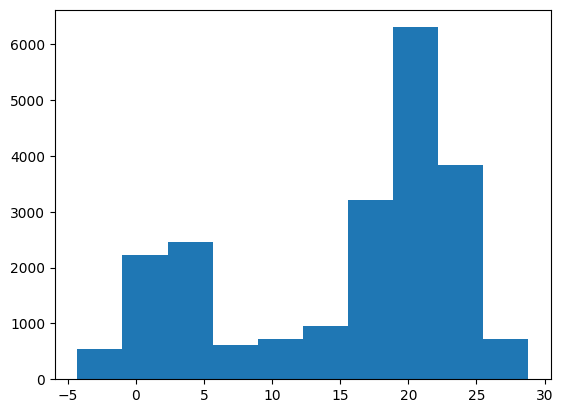

In [15]:
plt.hist([BPN_100.loc[(BPN_100['fnum']%1400>=400) & (BPN_100['fnum']%1400<1000)]['x_vel']])
plt.show()

# Step length (dist b/w TD & LO)

## Front Legs

In [16]:
## L1
L1_SC = BPN_100_lightON['L1_stepcycle'].astype(int)
L1_diff = pd.DataFrame(np.diff(np.array(L1_SC)))
L1_TD_frame= pd.DataFrame(L1_diff.index[L1_diff[0]==1])
L1_LO_frame = pd.DataFrame(L1_diff.index[L1_diff[0]==-1])

In [17]:
L1_TaG_idx = [61,62,63]
L1_TaG = BPN_100_lightON.iloc[:,L1_TaG_idx ]

In [18]:
# getting pairs of TD and LO
L1_TD = []
L1_LO = []
for i in range(len(L1_TD_frame)-1):
    first_elem = L1_TD_frame.iloc[i,0]
    second_elem = L1_TD_frame.iloc[i+1,0]
    
    for i in range(len(L1_LO_frame)-1):
        test_elem = L1_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L1_TD.append(first_elem)
            L1_LO.append(test_elem)

In [19]:
L1_TD_pos= pd.DataFrame()
for step in range(len(L1_TD)):
    temp_TD = L1_TD_frame.iloc[step]
    L1_TD_pos = pd.concat([L1_TD_pos, L1_TaG.iloc[temp_TD, :]])
    
L1_LO_pos= pd.DataFrame()
for step in range(len(L1_LO)):
    temp_LO = L1_LO_frame.iloc[step]
    L1_LO_pos = pd.concat([L1_LO_pos, L1_TaG.iloc[temp_LO, :]])


In [20]:
stance_len_L1 =[]
for step in range(len(L1_TD_pos)):
    temp_len = math.dist(L1_TD_pos.iloc[step,:], L1_LO_pos.iloc[step,:])
    stance_len_L1.append(temp_len)

In [21]:
## R1
R1_SC = BPN_100_lightON['R1_stepcycle'].astype(int)
R1_diff = pd.DataFrame(np.diff(np.array(R1_SC)))
R1_TD_frame= pd.DataFrame(R1_diff.index[R1_diff[0]==1])
R1_LO_frame = pd.DataFrame(R1_diff.index[R1_diff[0]==-1])

In [22]:
# getting pairs of TD and LO
R1_TD = []
R1_LO = []
for i in range(len(R1_TD_frame)-1):
    first_elem = R1_TD_frame.iloc[i,0]
    second_elem = R1_TD_frame.iloc[i+1,0]
    
    for i in range(len(R1_LO_frame)-1):
        test_elem = R1_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R1_TD.append(first_elem)
            R1_LO.append(test_elem)

In [23]:
R1_TaG_idx = [16,17,18]
R1_TaG = BPN_100_lightON.iloc[:,R1_TaG_idx ]

In [24]:
R1_TD_pos= pd.DataFrame()
for step in range(len(R1_TD)):
    temp_TD = R1_TD_frame.iloc[step]
    R1_TD_pos = pd.concat([R1_TD_pos, R1_TaG.iloc[temp_TD, :]])
    
R1_LO_pos= pd.DataFrame()
for step in range(len(R1_LO)):
    temp_LO = R1_LO_frame.iloc[step]
    R1_LO_pos = pd.concat([R1_LO_pos, R1_TaG.iloc[temp_LO, :]])
    
stance_len_R1 =[]
for step in range(len(R1_TD_pos)):
    temp_len = math.dist(R1_TD_pos.iloc[step,:], R1_LO_pos.iloc[step,:])
    stance_len_R1.append(temp_len)

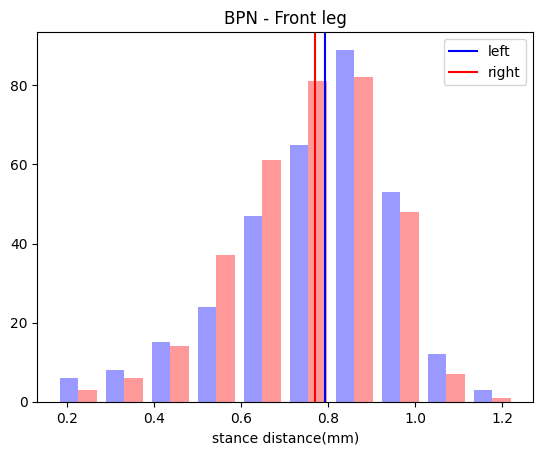

In [80]:
%matplotlib inline
plt.hist([stance_len_L1,stance_len_R1, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L1), color ='b')
plt.axvline(np.median(stance_len_R1), color ='r')
plt.title('BPN - Front leg')
plt.legend(['left', 'right'])
plt.xlabel('stance distance(mm)')
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\stance dist\\FL.png')

##  Mid legs

In [285]:
# L2 

In [26]:
L2_SC = BPN_100_lightON['L2_stepcycle'].astype(int)
L2_diff = pd.DataFrame(np.diff(np.array(L2_SC)))
L2_TD_frame= pd.DataFrame(L2_diff.index[L2_diff[0]==1])
L2_LO_frame = pd.DataFrame(L2_diff.index[L2_diff[0]==-1])

In [27]:
# getting pairs of TD and LO
L2_TD = []
L2_LO = []
for i in range(len(L2_TD_frame)-1):
    first_elem = L2_TD_frame.iloc[i,0]
    second_elem = L2_TD_frame.iloc[i+1,0]
    
    for i in range(len(L2_LO_frame)-1):
        test_elem = L2_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L2_TD.append(first_elem)
            L2_LO.append(test_elem)

In [28]:
L2_TaG_idx = [76,77,78]
L2_TaG = BPN_100_lightON.iloc[:,L2_TaG_idx ]

In [29]:
L2_TD_pos= pd.DataFrame()
for step in range(len(L2_TD)):
    temp_TD = L2_TD_frame.iloc[step]
    L2_TD_pos = pd.concat([L2_TD_pos, L2_TaG.iloc[temp_TD, :]])
    
L2_LO_pos= pd.DataFrame()
for step in range(len(L2_LO)):
    temp_LO = L2_LO_frame.iloc[step]
    L2_LO_pos = pd.concat([L2_LO_pos, L2_TaG.iloc[temp_LO, :]])
    
stance_len_L2 =[]
for step in range(len(L2_TD_pos)):
    temp_len = math.dist(L2_TD_pos.iloc[step,:], L2_LO_pos.iloc[step,:])
    stance_len_L2.append(temp_len)

In [30]:
# R2

In [31]:
R2_SC = BPN_100_lightON['R2_stepcycle'].astype(int)
R2_diff = pd.DataFrame(np.diff(np.array(R2_SC)))
R2_TD_frame= pd.DataFrame(R2_diff.index[R2_diff[0]==1])
R2_LO_frame = pd.DataFrame(R2_diff.index[R2_diff[0]==-1])

In [32]:
# getting pairs of TD and LO
R2_TD = []
R2_LO = []
for i in range(len(R2_TD_frame)-1):
    first_elem = R2_TD_frame.iloc[i,0]
    second_elem = R2_TD_frame.iloc[i+1,0]
    
    for i in range(len(R2_LO_frame)-1):
        test_elem = R2_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R2_TD.append(first_elem)
            R2_LO.append(test_elem)

In [33]:
R2_TaG_idx = [31,32,33]
R2_TaG = BPN_100_lightON.iloc[:,R2_TaG_idx ]

In [34]:
R2_TD_pos= pd.DataFrame()
for step in range(len(L2_TD)):
    temp_TD = R2_TD_frame.iloc[step]
    R2_TD_pos = pd.concat([R2_TD_pos, R2_TaG.iloc[temp_TD, :]])
    
R2_LO_pos= pd.DataFrame()
for step in range(len(R2_LO)):
    temp_LO = R2_LO_frame.iloc[step]
    R2_LO_pos = pd.concat([R2_LO_pos, R2_TaG.iloc[temp_LO, :]])
    
stance_len_R2 =[]
for step in range(len(R2_TD_pos)):
    temp_len = math.dist(R2_TD_pos.iloc[step,:], R2_LO_pos.iloc[step,:])
    stance_len_R2.append(temp_len)

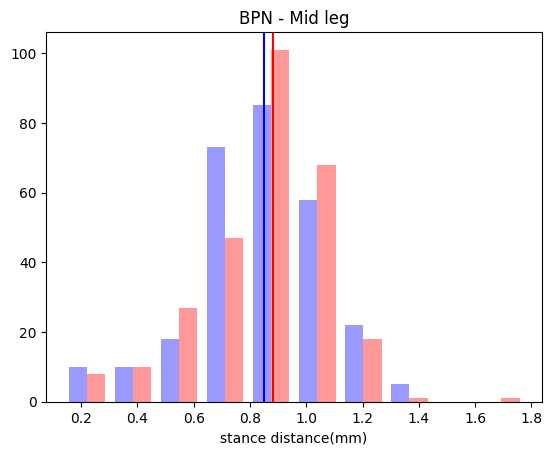

In [81]:
plt.hist([stance_len_L2,stance_len_R2, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L2), color ='b')
plt.axvline(np.median(stance_len_R2), color ='r')
plt.title('BPN - Mid leg')
#plt.legend(['left', 'right'])
plt.xlabel('stance distance(mm)')
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\stance dist\\ML.png')

## hind Legs

In [296]:
# L3 

In [36]:
L3_SC = BPN_100_lightON['L3_stepcycle'].astype(int)
L3_diff = pd.DataFrame(np.diff(np.array(L3_SC)))
L3_TD_frame= pd.DataFrame(L3_diff.index[L3_diff[0]==1])
L3_LO_frame = pd.DataFrame(L3_diff.index[L3_diff[0]==-1])

In [37]:
# getting pairs of TD and LO
L3_TD = []
L3_LO = []
for i in range(len(L3_TD_frame)-1):
    first_elem = L3_TD_frame.iloc[i,0]
    second_elem = L3_TD_frame.iloc[i+1,0]
    
    for i in range(len(L3_LO_frame)-1):
        test_elem = L3_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L3_TD.append(first_elem)
            L3_LO.append(test_elem)

In [38]:
L3TaG_idx = [91,92,93]
L3_TaG = BPN_100_lightON.iloc[:,L3TaG_idx ]

In [39]:
L3_TaG

,L-H-TaG_x,L-H-TaG_y,L-H-TaG_z
0,-1.471553,1.144558,99.187051
1,-1.393049,1.036734,99.201001
2,-1.221696,0.982908,99.246980
3,-1.001129,0.981931,99.299972
4,-0.830206,1.009691,99.333381
...,...,...,...
5334,-0.841592,1.119786,99.415382
5335,-0.914252,1.145141,99.384505
5336,-1.007631,1.171702,99.369472
5337,-1.108404,1.203064,99.368506


In [40]:
L3_TD_pos= pd.DataFrame()
for step in range(len(L3_TD)):
    temp_TD = L3_TD_frame.iloc[step]
    L3_TD_pos = pd.concat([L3_TD_pos, L3_TaG.iloc[temp_TD, :]])
    
L3_LO_pos= pd.DataFrame()
for step in range(len(L3_LO)):
    temp_LO = L3_LO_frame.iloc[step]
    L3_LO_pos = pd.concat([L3_LO_pos, L3_TaG.iloc[temp_LO, :]])
    
stance_len_L3 =[]
for step in range(len(L3_TD_pos)):
    temp_len = math.dist(L3_TD_pos.iloc[step,:], L3_LO_pos.iloc[step,:])
    stance_len_L3.append(temp_len)

In [41]:
# R3

In [44]:
R3_SC = BPN_100_lightON['R3_stepcycle'].astype(int)
R3_diff = pd.DataFrame(np.diff(np.array(R3_SC)))
R3_TD_frame= pd.DataFrame(R3_diff.index[R3_diff[0]==1])
R3_LO_frame = pd.DataFrame(R3_diff.index[R3_diff[0]==-1])

In [45]:
# getting pairs of TD and LO
R3_TD = []
R3_LO = []
for i in range(len(R3_TD_frame)-1):
    first_elem = R3_TD_frame.iloc[i,0]
    second_elem = R3_TD_frame.iloc[i+1,0]
    
    for i in range(len(R3_LO_frame)-1):
        test_elem = R3_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R3_TD.append(first_elem)
            R3_LO.append(test_elem)

In [46]:
R3_TaG_idx = [46,47,48]
R3_TaG = BPN_100_lightON.iloc[:,R3_TaG_idx ]

In [47]:
R3_TaG

,R-H-TaG_x,R-H-TaG_y,R-H-TaG_z
0,-1.225334,1.487138,98.190197
1,-1.301186,1.530028,98.267690
2,-1.349700,1.582739,98.342423
3,-1.387878,1.627400,98.392529
4,-1.435110,1.654323,98.401074
...,...,...,...
5334,-1.357970,1.625263,98.033784
5335,-1.343440,1.607439,98.050894
5336,-1.266913,1.562241,98.045318
5337,-1.126765,1.501305,98.014062


In [48]:
R3_TD_pos= pd.DataFrame()
for step in range(len(R3_TD)):
    temp_TD = R3_TD_frame.iloc[step]
    R3_TD_pos = pd.concat([R3_TD_pos, R3_TaG.iloc[temp_TD, :]])
    
R3_LO_pos= pd.DataFrame()
for step in range(len(R3_LO)):
    temp_LO = R3_LO_frame.iloc[step]
    R3_LO_pos = pd.concat([R3_LO_pos, R3_TaG.iloc[temp_LO, :]])
    
stance_len_R3 =[]
for step in range(len(R3_TD_pos)):
    temp_len = math.dist(R3_TD_pos.iloc[step,:], R3_LO_pos.iloc[step,:])
    stance_len_R3.append(temp_len)

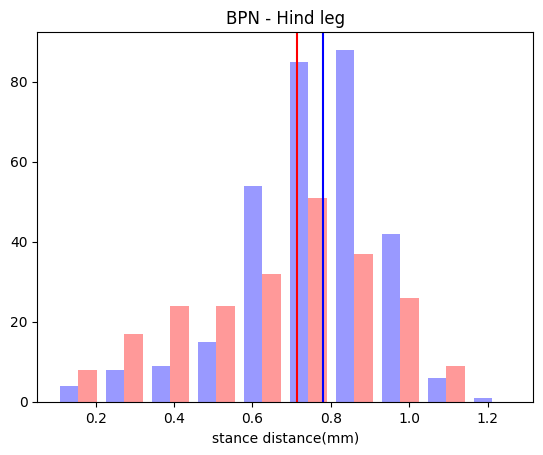

In [82]:
plt.hist([stance_len_L3,stance_len_R3, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L3), color ='b')
plt.axvline(np.median(stance_len_R3), color ='r')
plt.title('BPN - Hind leg')
#plt.legend(['left', 'right'])
plt.xlabel('stance distance(mm)')
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\stance dist\\HL.png')

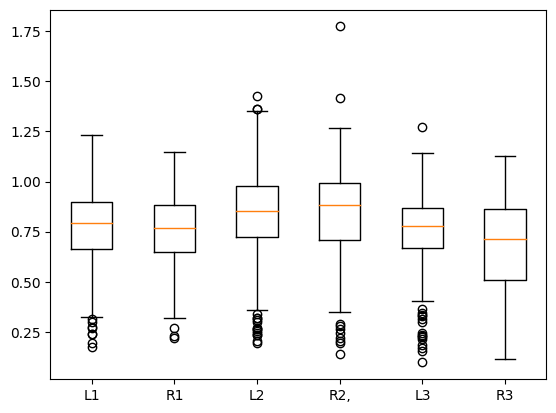

In [83]:
plt.boxplot([stance_len_L1, stance_len_R1,stance_len_L2, stance_len_R2,stance_len_L3, stance_len_R3], labels = ['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\stance dist\\bar.png')

# Step Period

In [51]:
# time between consecutive touchdowns

In [52]:
L1_SP = np.diff(np.array(L1_TD))
L2_SP = np.diff(np.array(L2_TD))
L3_SP = np.diff(np.array(L3_TD))

R1_SP = np.diff(np.array(R1_TD))
R2_SP = np.diff(np.array(R2_TD))
R3_SP = np.diff(np.array(R3_TD))

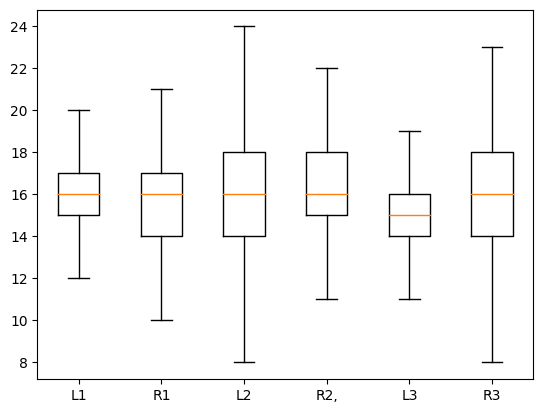

In [84]:
plt.boxplot([L1_SP, R1_SP,L2_SP, R2_SP,L3_SP, R3_SP], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\step priod\\stepperiod.png')

# Duty cycle

In [54]:
# fraction of step period spent in stance

In [55]:
L1_SD = []
for i in range (len(L1_LO)-1):
    temp_SD = L1_LO[i] - L1_TD[i] # SD = stance duration
    L1_SD.append (temp_SD)
    
L2_SD = []
for i in range (len(L2_LO)-1):
    temp_SD = L2_LO[i] - L2_TD[i] # SD = stance duration
    L2_SD.append (temp_SD)
    
L3_SD = []
for i in range (len(L3_LO)-1):
    temp_SD = L3_LO[i] - L3_TD[i] # SD = stance duration
    L3_SD.append (temp_SD)
    
R1_SD = []
for i in range (len(R1_LO)-1):
    temp_SD = R1_LO[i] - R1_TD[i] # SD = stance duration
    R1_SD.append (temp_SD)
    
R2_SD = []
for i in range (len(R2_LO)-1):
    temp_SD = R2_LO[i] - R2_TD[i] # SD = stance duration
    R2_SD.append (temp_SD)
    
R3_SD = []
for i in range (len(R3_LO)-1):
    temp_SD = R3_LO[i] - R3_TD[i] # SD = stance duration
    R3_SD.append (temp_SD)

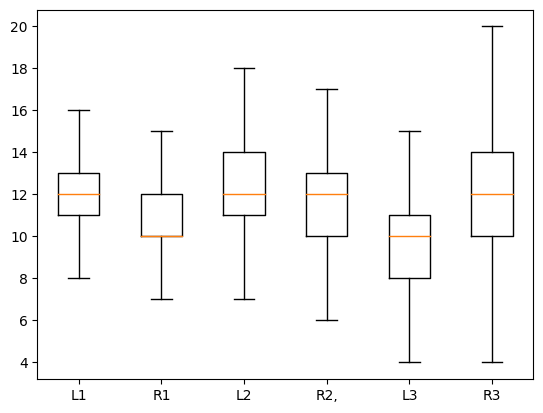

In [85]:
%matplotlib inline
plt.boxplot([L1_SD, R1_SD,L2_SD, R2_SD,L3_SD, R3_SD], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\step priod\\stancedur.png')

In [57]:
L1_DC = []
for i in range(len(L1_SD)):
    temp_DC =L1_SD[i] / L1_SP[i]
    L1_DC.append(temp_DC)
    
L2_DC = []
for i in range(len(L2_SD)):
    temp_DC =L2_SD[i] / L2_SP[i] 
    L2_DC.append(temp_DC)
    
L3_DC = []
for i in range(len(L3_SD)):
    temp_DC =L3_SD[i] / L3_SP[i]
    L3_DC.append(temp_DC)
    
R1_DC = []
for i in range(len(R1_SD)):
    temp_DC =R1_SD[i] / R1_SP[i]
    R1_DC.append(temp_DC)
    
R2_DC = []
for i in range(len(R2_SD)):
    temp_DC= R2_SD[i] / R2_SP[i]
    R2_DC.append(temp_DC)
    
R3_DC = []
for i in range(len(R3_SD)):
    temp_DC =R3_SD[i] / R3_SP[i]
    R3_DC.append(temp_DC)

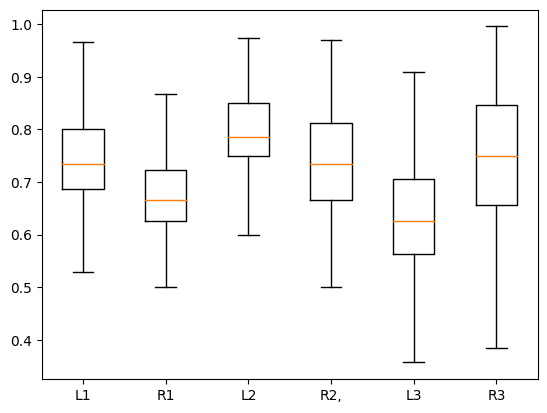

In [86]:
plt.boxplot([L1_DC, R1_DC,L2_DC, R2_DC,L3_DC, R3_DC], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\step priod\\dutycycle.png')

# Swing Duration

In [59]:
L1_swing = []
for i in range (len(L1_LO)-1):
    temp_sw = L1_SP[i] - L1_SD[i] # SD = stance duration
    L1_swing.append (temp_sw)
    
L2_swing = []
for i in range (len(L2_LO)-1):
    temp_sw = L2_SP[i] - L2_SD[i] # SD = stance duration
    L2_swing.append (temp_sw)
    
L3_swing = []
for i in range (len(L3_LO)-1):
    temp_sw = L3_SP[i] - L3_SD[i] # SD = stance duration
    L3_swing.append (temp_sw)
    
R1_swing = []
for i in range (len(R1_LO)-1):
    temp_sw = R1_SP[i] - R1_SD[i] # SD = stance duration
    R1_swing.append (temp_sw)
    
R2_swing = []
for i in range (len(R2_LO)-1):
    temp_sw = R2_SP[i] - R2_SD[i] # SD = stance duration
    R2_swing.append (temp_sw)
    
R3_swing = []
for i in range (len(R3_LO)-1):
    temp_sw = R3_SP[i] - R3_SD[i] # SD = stance duration
    R3_swing.append (temp_sw)

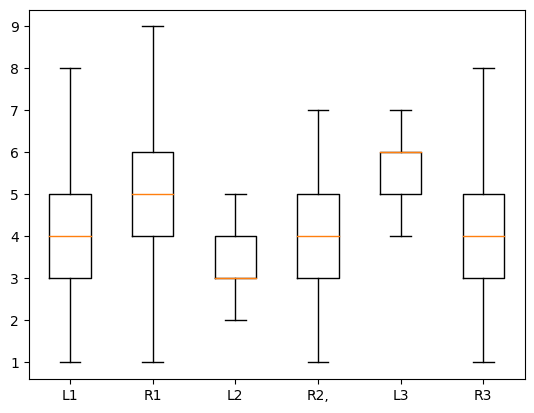

In [87]:
plt.boxplot([L1_swing, R1_swing,L2_swing, R2_swing,L3_swing, R3_swing], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\step priod\\swingdur.png')

# Interleg Phase

In [61]:
#L1>R1 (R1 wrf L1)
ref = L1_TD_frame
test= R1_TD_frame

phase_L1R1 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_L1R1.append(temp_phase)

In [62]:
#L1>R1 (R1 wrf L1)
ref = L2_TD_frame
test= R2_TD_frame

phase_L2R2 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_L2R2.append(temp_phase)

In [63]:
#L1>R1 (R1 wrf L1)
ref = L3_TD_frame
test= R3_TD_frame

phase_L3R3 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_L3R3.append(temp_phase)

In [64]:
#L1>R1 (R1 wrf L1)
ref = L2_TD_frame
test= L1_TD_frame

phase_L2L1 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_L2L1.append(temp_phase)

In [65]:
#L1>R1 (R1 wrf L1)
ref = R2_TD_frame
test= R1_TD_frame

phase_R2R1 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_R2R1.append(temp_phase)

In [66]:
#L1>R1 (R1 wrf L1)
ref = L1_TD_frame
test= L3_TD_frame

phase_L1L3 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_L1L3.append(temp_phase)

In [67]:
#L1>R1 (R1 wrf L1)
ref = R1_TD_frame
test= R3_TD_frame

phase_R1R3 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_R1R3.append(temp_phase)

In [68]:
#L1>R1 (R1 wrf L1)
ref = L1_TD_frame
test= R2_TD_frame

phase_L1R2 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_L1R2.append(temp_phase)

In [69]:
#L1>R1 (R1 wrf L1)
ref = R1_TD_frame
test= L2_TD_frame

phase_R1L2 = []
for i in range(len(ref)-1):
    temp_ref1 = int(ref.iloc[i])
    temp_ref2 = int(ref.iloc[i+1])

    for l in range(len(test)):
        temp_test = int(test.iloc[l])
        if temp_ref1< temp_test < temp_ref2:
            step = temp_ref2 - temp_ref1
            offset = temp_ref2 - temp_test
            temp_phase = offset/step
            phase_R1L2.append(temp_phase)

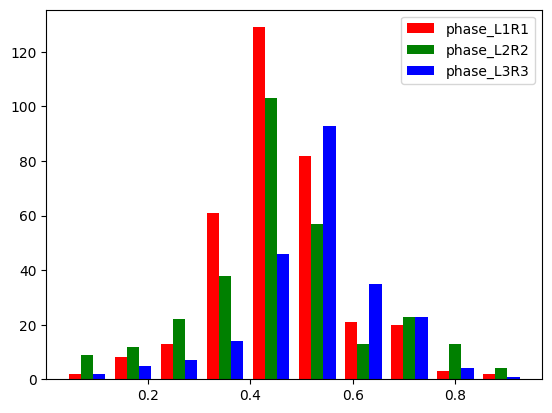

In [89]:
plt.hist([phase_L1R1, phase_L2R2, phase_L3R3], color= ['r', 'g', 'b'])
plt.legend(['phase_L1R1', 'phase_L2R2', 'phase_L3R3'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\phase\\contra_anti.png')


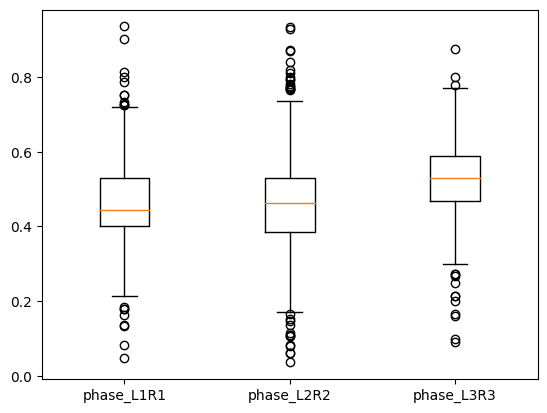

In [90]:
plt.boxplot([phase_L1R1, phase_L2R2, phase_L3R3], labels = ['phase_L1R1', 'phase_L2R2', 'phase_L3R3'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\phase\\contra_anti_bar.png')


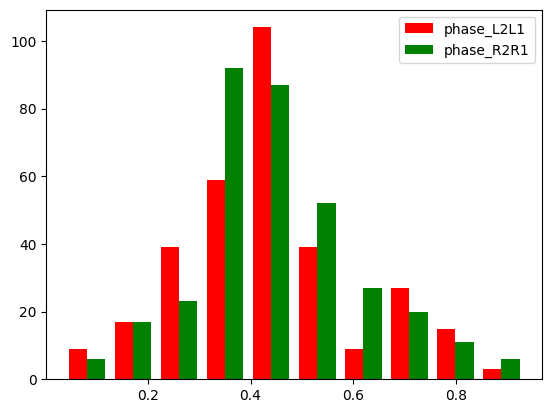

In [91]:
plt.hist([phase_L2L1, phase_R2R1], color= ['r', 'g'])
plt.legend(['phase_L2L1', 'phase_R2R1'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\phase\\ipsi_anti.png')

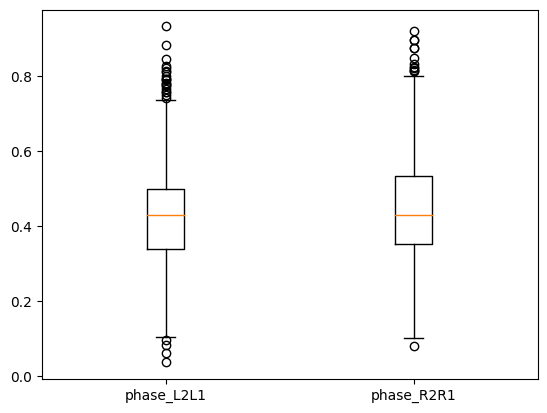

In [92]:
plt.boxplot([phase_L2L1, phase_R2R1], labels =['phase_L2L1', 'phase_R2R1'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\phase\\ipsi_anti_bar.png')

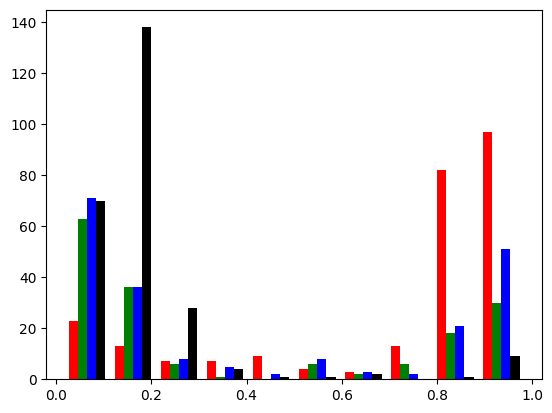

In [93]:
plt.hist([phase_L1L3, phase_R1R3, phase_L1R2, phase_R1L2], color= ['r', 'g', 'b', 'k'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\phase\\inphase.png')

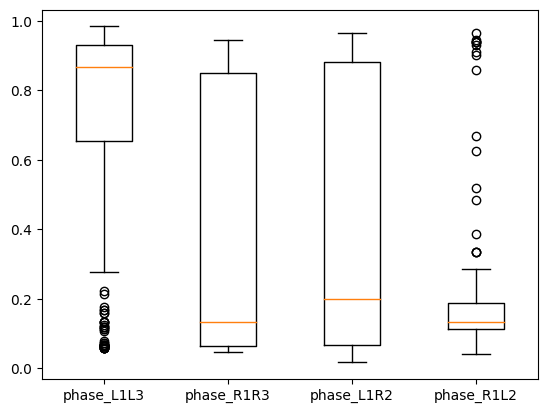

In [94]:
plt.boxplot([phase_L1L3, phase_R1R3, phase_L1R2, phase_R1L2], labels = ['phase_L1L3', 'phase_R1R3', 'phase_L1R2', 'phase_R1L2'])
# plt.savefig('C:\\Users\\SthanuKumarD\\OneDrive - Max Planck Florida Institute for Neuroscience\\Desktop\\Meeting_fig\\BPN\\phase\\inphase_bar.png')

In [78]:
# L1_TD_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\L1_TD.csv')
# L1_LO_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\L1_LO.csv')

# L2_TD_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\L2_TD.csv')
# L2_LO_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\L2_LO.csv')

# L3_TD_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\L3_TD.csv')
# L3_LO_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\L3_LO.csv')

# R1_TD_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\R1_TD.csv')
# R1_LO_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\R1_LO.csv')

# R2_TD_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\R2_TD.csv')
# R2_LO_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\R2_LO.csv')

# R3_TD_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\R3_TD.csv')
# R3_LO_pos.to_csv('Z:\\Ballsystem_LegKinematics_DataStructures\\BPN_step cycles\\R3_LO.csv')

<IPython.core.display.Javascript object>


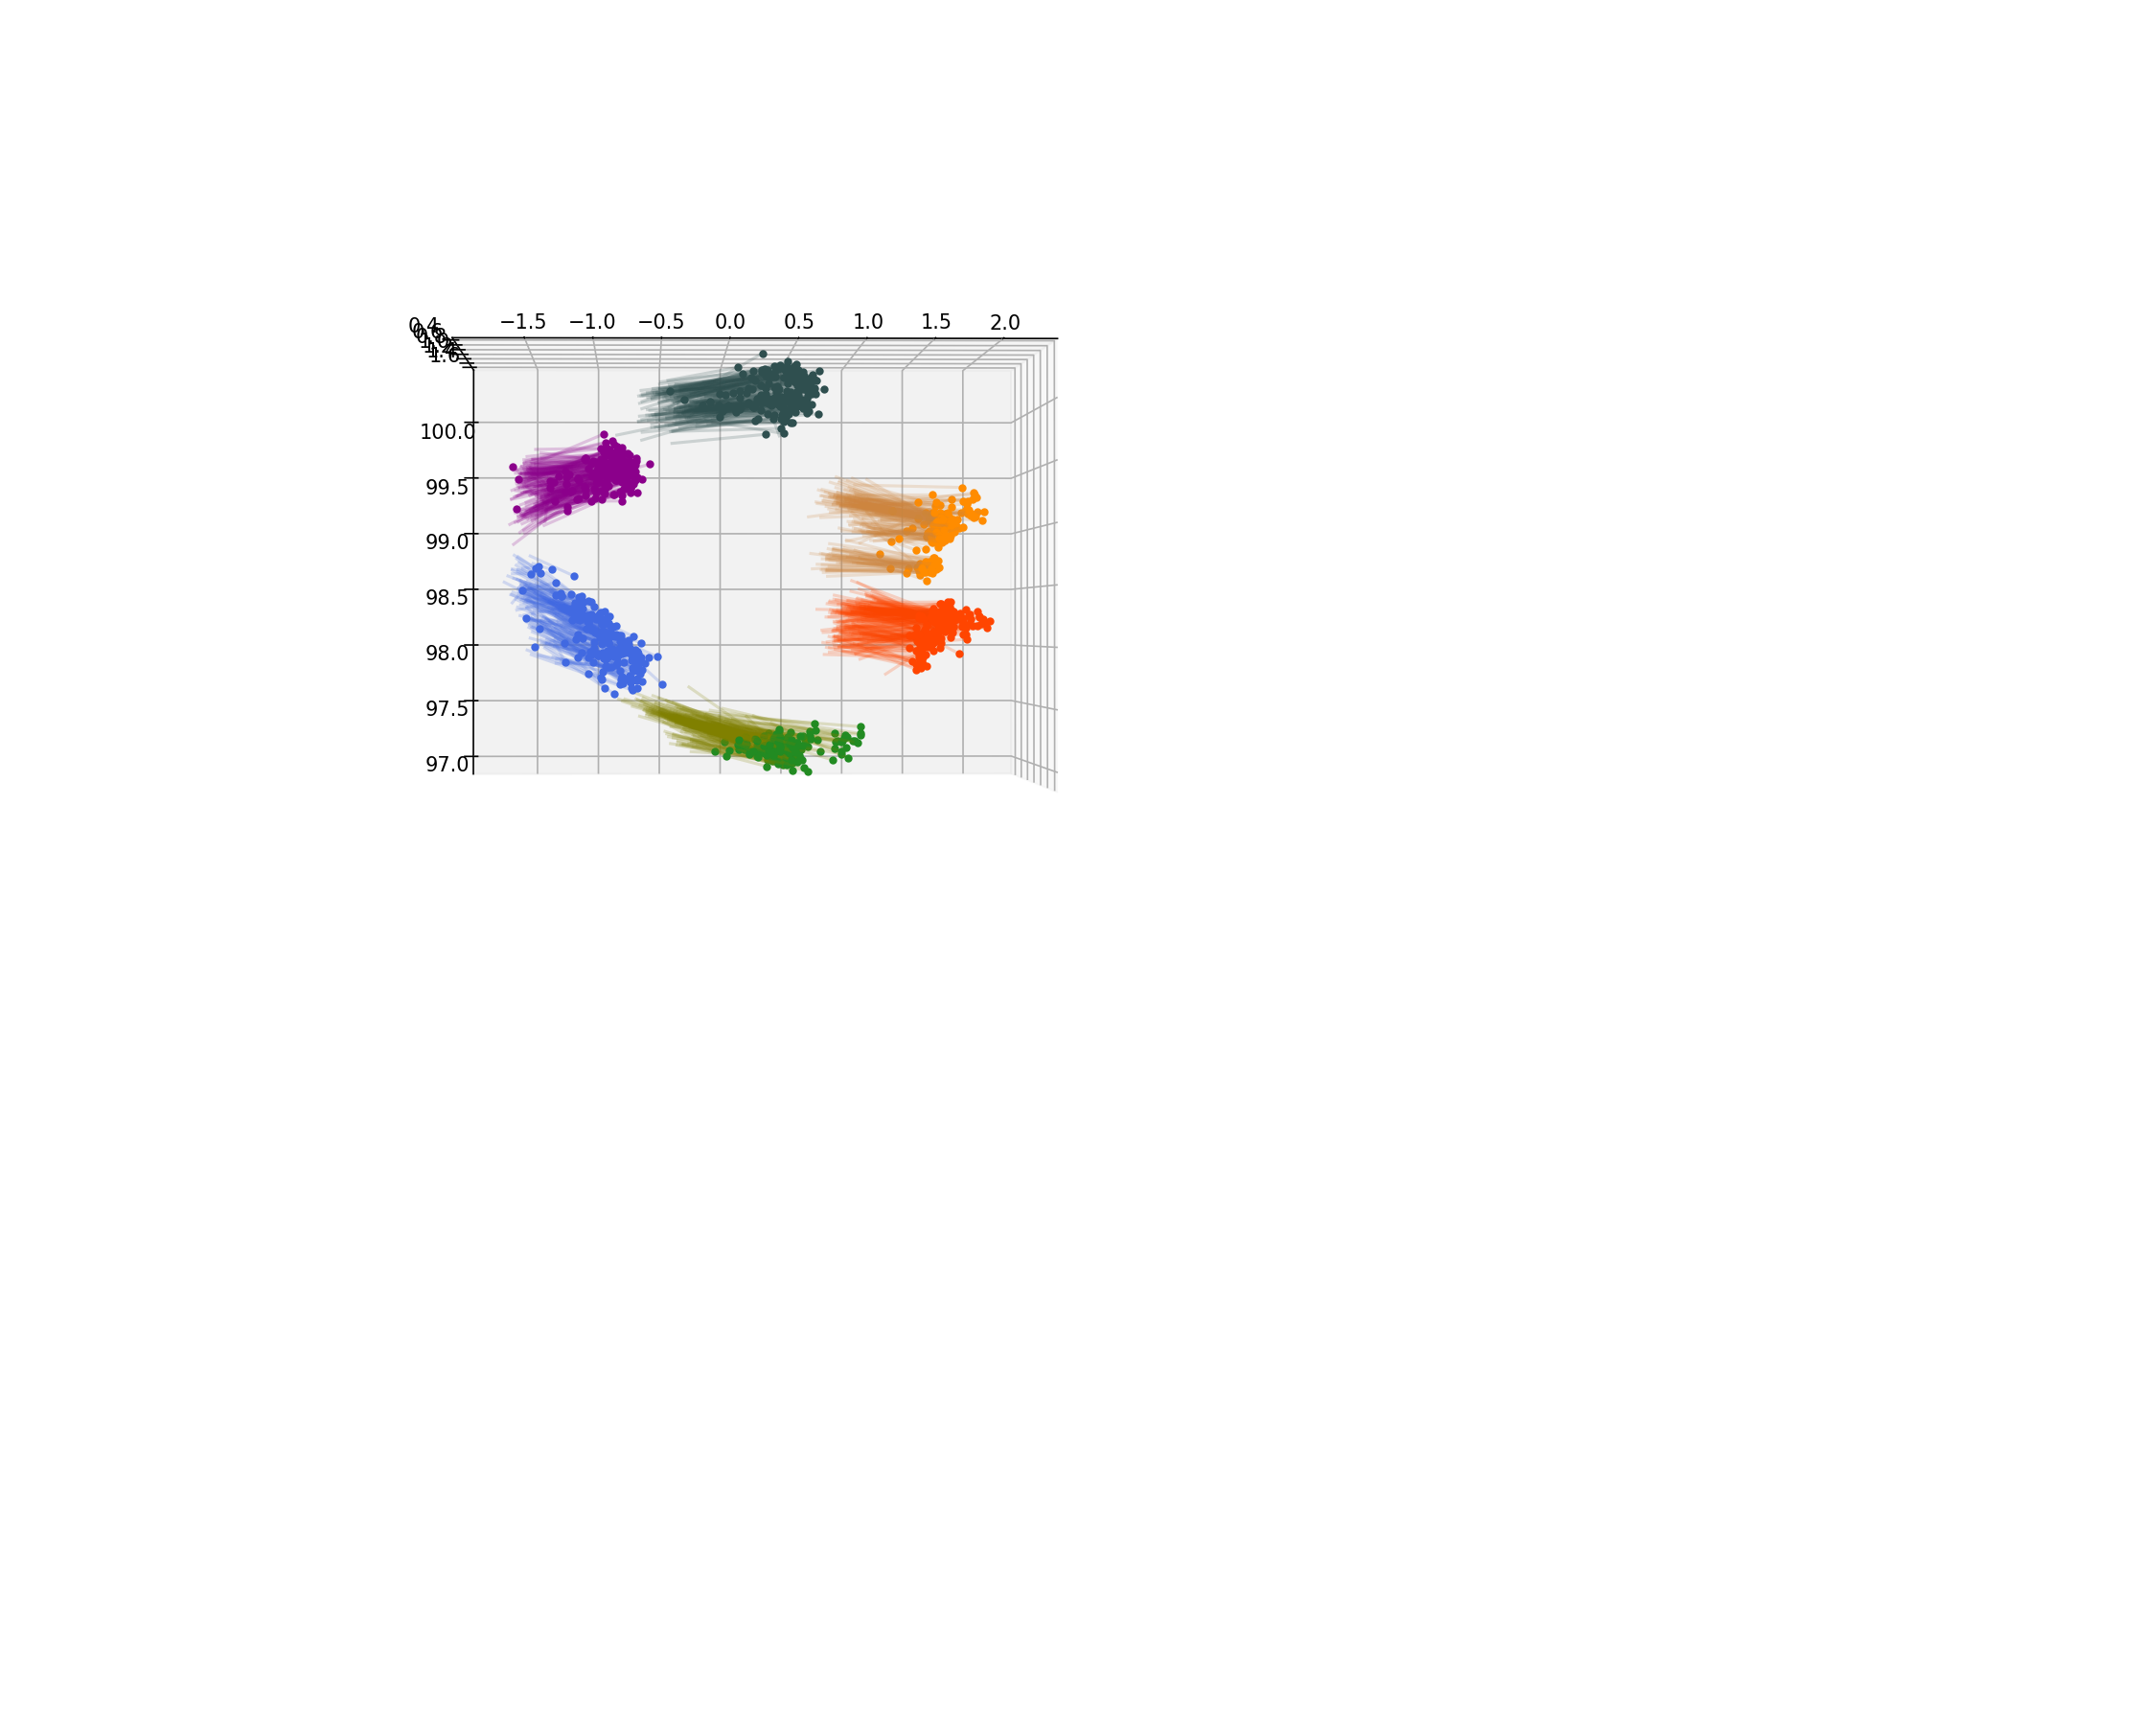

In [96]:
%matplotlib notebook
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection="3d")
for i in range (200):
    x, y, z = [L1_TD_pos.iloc[i,0], L1_LO_pos.iloc[i,0]], [L1_TD_pos.iloc[i,1], L1_LO_pos.iloc[i,1]], [L1_TD_pos.iloc[i,2], L1_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'peru' ,alpha = 0.2, linewidth=1.5)
    ax.plot3D(L1_TD_pos.iloc[i,0],L1_TD_pos.iloc[i,1],L1_TD_pos.iloc[i,2], '.', color = 'darkorange')
    
for i in range (200):
    x, y, z = [R1_TD_pos.iloc[i,0], R1_LO_pos.iloc[i,0]], [R1_TD_pos.iloc[i,1], R1_LO_pos.iloc[i,1]], [R1_TD_pos.iloc[i,2], R1_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'orangered' ,alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R1_TD_pos.iloc[i,0],R1_TD_pos.iloc[i,1],R1_TD_pos.iloc[i,2], '.', color = 'orangered')
    
for i in range (200):
    x, y, z = [L2_TD_pos.iloc[i,0], L2_LO_pos.iloc[i,0]], [L2_TD_pos.iloc[i,1], L2_LO_pos.iloc[i,1]], [L2_TD_pos.iloc[i,2], L2_LO_pos.iloc[i,2]]
    ax.plot(x, y, z,color = 'darkslategrey' ,  alpha = 0.2, linewidth=1.5)  
    ax.plot3D(L2_TD_pos.iloc[i,0],L2_TD_pos.iloc[i,1],L2_TD_pos.iloc[i,2], '.', color = 'darkslategrey')
    
for i in range (200):
    x, y, z = [R2_TD_pos.iloc[i,0], R2_LO_pos.iloc[i,0]], [R2_TD_pos.iloc[i,1], R2_LO_pos.iloc[i,1]], [R2_TD_pos.iloc[i,2], R2_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'olive' , alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R2_TD_pos.iloc[i,0],R2_TD_pos.iloc[i,1],R2_TD_pos.iloc[i,2], '.', color = 'forestgreen')
    
for i in range (200):
    x, y, z = [L3_TD_pos.iloc[i,0], L3_LO_pos.iloc[i,0]], [L3_TD_pos.iloc[i,1], L3_LO_pos.iloc[i,1]], [L3_TD_pos.iloc[i,2], L3_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'darkmagenta', alpha = 0.2, linewidth=1.5) 
    ax.plot3D(L3_TD_pos.iloc[i,0],L3_TD_pos.iloc[i,1],L3_TD_pos.iloc[i,2], '.', color = 'darkmagenta')
    
for i in range (200):
    x, y, z = [R3_TD_pos.iloc[i,0], R3_LO_pos.iloc[i,0]], [R3_TD_pos.iloc[i,1], R3_LO_pos.iloc[i,1]], [R3_TD_pos.iloc[i,2], R3_LO_pos.iloc[i,2]]
    ax.plot(x, y, z,color = 'royalblue', alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R3_TD_pos.iloc[i,0],R3_TD_pos.iloc[i,1],R3_TD_pos.iloc[i,2], '.', color = 'royalblue')
    


plt.show()


# low vel (<3)

In [221]:
%matplotlib inline

In [222]:
P9LT_100 = P9LT.loc[(P9LT["SF"] == 100) | (P9LT["SF"] == 66)]
P9LT_100_lightON = P9LT_100.loc[(P9LT_100['fnum']%1400>=400) & (P9LT_100['fnum']%1400<1000) &(abs(P9LT_100['z_vel'])<3) ]
P9LT_100_lightON =P9LT_100_lightON.reset_index(drop=True)

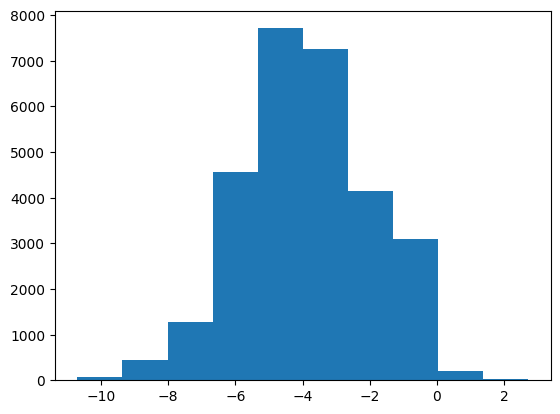

In [223]:
plt.hist([P9LT_100.loc[(P9LT_100['fnum']%1400>=400) & (P9LT_100['fnum']%1400<1000)]['z_vel']])
plt.show()

# Step length (dist b/w TD & LO)

## Front Legs

In [224]:
## L1
L1_SC = P9LT_100_lightON['R1_stepcycle'].astype(int)
L1_diff = pd.DataFrame(np.diff(np.array(L1_SC)))
L1_TD_frame= pd.DataFrame(L1_diff.index[L1_diff[0]==1])
L1_LO_frame = pd.DataFrame(L1_diff.index[L1_diff[0]==-1])

In [225]:
L1_TaG_idx = [61,62,63]
L1_TaG = P9LT_100_lightON.iloc[:,L1_TaG_idx ]

In [226]:
# getting pairs of TD and LO
L1_TD = []
L1_LO = []
for i in range(len(L1_TD_frame)-1):
    first_elem = L1_TD_frame.iloc[i,0]
    second_elem = L1_TD_frame.iloc[i+1,0]
    
    for i in range(len(L1_LO_frame)-1):
        test_elem = L1_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L1_TD.append(first_elem)
            L1_LO.append(test_elem)

In [227]:
L1_TD_pos= pd.DataFrame()
for step in range(len(L1_TD)):
    temp_TD = L1_TD_frame.iloc[step]
    L1_TD_pos = pd.concat([L1_TD_pos, L1_TaG.iloc[temp_TD, :]])
    
L1_LO_pos= pd.DataFrame()
for step in range(len(L1_LO)):
    temp_LO = L1_LO_frame.iloc[step]
    L1_LO_pos = pd.concat([L1_LO_pos, L1_TaG.iloc[temp_LO, :]])


In [228]:
stance_len_L1 =[]
for step in range(len(L1_TD_pos)):
    temp_len = math.dist(L1_TD_pos.iloc[step,:], L1_LO_pos.iloc[step,:])
    stance_len_L1.append(temp_len)

In [229]:
## R1
R1_SC = P9LT_100_lightON['L1_stepcycle'].astype(int)
R1_diff = pd.DataFrame(np.diff(np.array(R1_SC)))
R1_TD_frame= pd.DataFrame(R1_diff.index[R1_diff[0]==1])
R1_LO_frame = pd.DataFrame(R1_diff.index[R1_diff[0]==-1])

In [230]:
# getting pairs of TD and LO
R1_TD = []
R1_LO = []
for i in range(len(R1_TD_frame)-1):
    first_elem = R1_TD_frame.iloc[i,0]
    second_elem = R1_TD_frame.iloc[i+1,0]
    
    for i in range(len(R1_LO_frame)-1):
        test_elem = R1_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R1_TD.append(first_elem)
            R1_LO.append(test_elem)

In [231]:
R1_TaG_idx = [16,17,18]
R1_TaG = P9LT_100_lightON.iloc[:,R1_TaG_idx ]

In [232]:
R1_TD_pos= pd.DataFrame()
for step in range(len(R1_TD)):
    temp_TD = R1_TD_frame.iloc[step]
    R1_TD_pos = pd.concat([R1_TD_pos, R1_TaG.iloc[temp_TD, :]])
    
R1_LO_pos= pd.DataFrame()
for step in range(len(R1_LO)):
    temp_LO = R1_LO_frame.iloc[step]
    R1_LO_pos = pd.concat([R1_LO_pos, R1_TaG.iloc[temp_LO, :]])
    
stance_len_R1 =[]
for step in range(len(R1_TD_pos)):
    temp_len = math.dist(R1_TD_pos.iloc[step,:], R1_LO_pos.iloc[step,:])
    stance_len_R1.append(temp_len)

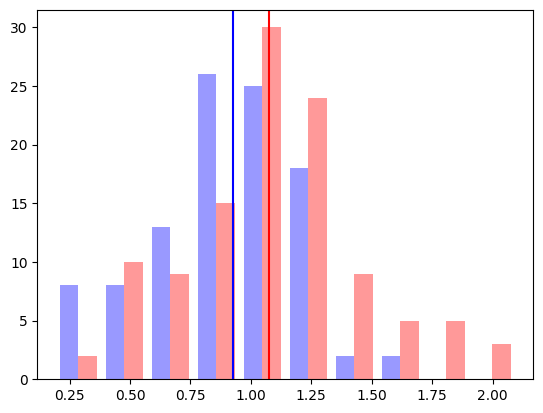

In [233]:
%matplotlib inline
plt.hist([stance_len_L1,stance_len_R1, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L1), color ='b')
plt.axvline(np.median(stance_len_R1), color ='r')

##  Mid legs

In [234]:
# L2 

In [235]:
L2_SC = P9LT_100_lightON['R2_stepcycle'].astype(int)
L2_diff = pd.DataFrame(np.diff(np.array(L2_SC)))
L2_TD_frame= pd.DataFrame(L2_diff.index[L2_diff[0]==1])
L2_LO_frame = pd.DataFrame(L2_diff.index[L2_diff[0]==-1])

In [236]:
# getting pairs of TD and LO
L2_TD = []
L2_LO = []
for i in range(len(L2_TD_frame)-1):
    first_elem = L2_TD_frame.iloc[i,0]
    second_elem = L2_TD_frame.iloc[i+1,0]
    
    for i in range(len(L2_LO_frame)-1):
        test_elem = L2_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L2_TD.append(first_elem)
            L2_LO.append(test_elem)

In [237]:
L2_TaG_idx = [76,77,78]
L2_TaG = P9LT_100_lightON.iloc[:,L2_TaG_idx ]

In [238]:
L2_TD_pos= pd.DataFrame()
for step in range(len(L2_TD)):
    temp_TD = L2_TD_frame.iloc[step]
    L2_TD_pos = pd.concat([L2_TD_pos, L2_TaG.iloc[temp_TD, :]])
    
L2_LO_pos= pd.DataFrame()
for step in range(len(L2_LO)):
    temp_LO = L2_LO_frame.iloc[step]
    L2_LO_pos = pd.concat([L2_LO_pos, L2_TaG.iloc[temp_LO, :]])
    
stance_len_L2 =[]
for step in range(len(L2_TD_pos)):
    temp_len = math.dist(L2_TD_pos.iloc[step,:], L2_LO_pos.iloc[step,:])
    stance_len_L2.append(temp_len)

In [239]:
# R2

In [240]:
R2_SC = P9LT_100_lightON['L2_stepcycle'].astype(int)
R2_diff = pd.DataFrame(np.diff(np.array(R2_SC)))
R2_TD_frame= pd.DataFrame(R2_diff.index[R2_diff[0]==1])
R2_LO_frame = pd.DataFrame(R2_diff.index[R2_diff[0]==-1])

In [241]:
# getting pairs of TD and LO
R2_TD = []
R2_LO = []
for i in range(len(R2_TD_frame)-1):
    first_elem = R2_TD_frame.iloc[i,0]
    second_elem = R2_TD_frame.iloc[i+1,0]
    
    for i in range(len(R2_LO_frame)-1):
        test_elem = R2_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R2_TD.append(first_elem)
            R2_LO.append(test_elem)

In [242]:
R2_TaG_idx = [31,32,33]
R2_TaG = P9LT_100_lightON.iloc[:,R2_TaG_idx ]

In [243]:
R2_TD_pos= pd.DataFrame()
for step in range(len(L2_TD)):
    temp_TD = R2_TD_frame.iloc[step]
    R2_TD_pos = pd.concat([R2_TD_pos, R2_TaG.iloc[temp_TD, :]])
    
R2_LO_pos= pd.DataFrame()
for step in range(len(R2_LO)):
    temp_LO = R2_LO_frame.iloc[step]
    R2_LO_pos = pd.concat([R2_LO_pos, R2_TaG.iloc[temp_LO, :]])
    
stance_len_R2 =[]
for step in range(len(R2_TD_pos)):
    temp_len = math.dist(R2_TD_pos.iloc[step,:], R2_LO_pos.iloc[step,:])
    stance_len_R2.append(temp_len)

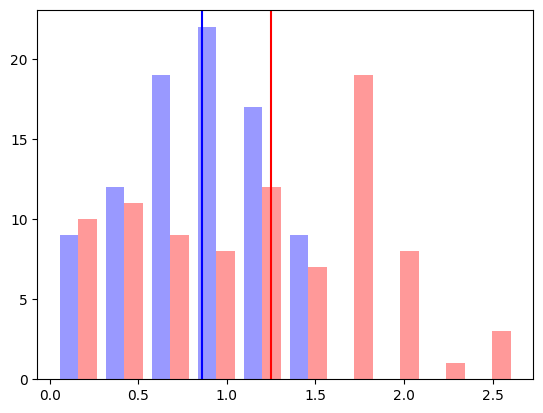

In [244]:
plt.hist([stance_len_L2,stance_len_R2, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L2), color ='b')
plt.axvline(np.median(stance_len_R2), color ='r')

## hind Legs

In [245]:
# L3 

In [246]:
L3_SC = P9LT_100_lightON['R3_stepcycle'].astype(int)
L3_diff = pd.DataFrame(np.diff(np.array(L3_SC)))
L3_TD_frame= pd.DataFrame(L3_diff.index[L3_diff[0]==1])
L3_LO_frame = pd.DataFrame(L3_diff.index[L3_diff[0]==-1])

In [247]:
# getting pairs of TD and LO
L3_TD = []
L3_LO = []
for i in range(len(L3_TD_frame)-1):
    first_elem = L3_TD_frame.iloc[i,0]
    second_elem = L3_TD_frame.iloc[i+1,0]
    
    for i in range(len(L3_LO_frame)-1):
        test_elem = L3_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            L3_TD.append(first_elem)
            L3_LO.append(test_elem)

In [248]:
L3TaG_idx = [91,92,93]
L3_TaG = P9LT_100_lightON.iloc[:,L3TaG_idx ]

In [249]:
L3_TaG

,L-H-TaG_x,L-H-TaG_y,L-H-TaG_z
0,-1.403327,0.991248,90.536179
1,-1.404662,0.991214,90.507176
2,-1.405551,0.992205,90.478142
3,-1.404113,0.993362,90.452319
4,-1.401465,0.994330,90.431981
...,...,...,...
9043,-0.461028,1.162317,92.060359
9044,-0.458851,1.149973,92.054275
9045,-0.453154,1.139832,92.048078
9046,-0.441817,1.137983,92.040939


In [250]:
L3_TD_pos= pd.DataFrame()
for step in range(len(L3_TD)):
    temp_TD = L3_TD_frame.iloc[step]
    L3_TD_pos = pd.concat([L3_TD_pos, L3_TaG.iloc[temp_TD, :]])
    
L3_LO_pos= pd.DataFrame()
for step in range(len(L3_LO)):
    temp_LO = L3_LO_frame.iloc[step]
    L3_LO_pos = pd.concat([L3_LO_pos, L3_TaG.iloc[temp_LO, :]])
    
stance_len_L3 =[]
for step in range(len(L3_TD_pos)):
    temp_len = math.dist(L3_TD_pos.iloc[step,:], L3_LO_pos.iloc[step,:])
    stance_len_L3.append(temp_len)

In [251]:
# R3

In [252]:
R3_SC = P9LT_100_lightON['L3_stepcycle'].astype(int)
R3_diff = pd.DataFrame(np.diff(np.array(R3_SC)))
R3_TD_frame= pd.DataFrame(R3_diff.index[R3_diff[0]==1])
R3_LO_frame = pd.DataFrame(R3_diff.index[R3_diff[0]==-1])

In [253]:
# getting pairs of TD and LO
R3_TD = []
R3_LO = []
for i in range(len(R3_TD_frame)-1):
    first_elem = R3_TD_frame.iloc[i,0]
    second_elem = R3_TD_frame.iloc[i+1,0]
    
    for i in range(len(R3_LO_frame)-1):
        test_elem = R3_LO_frame.iloc[i,0]
        if first_elem<test_elem<second_elem:
            R3_TD.append(first_elem)
            R3_LO.append(test_elem)

In [254]:
R3_TaG_idx = [46,47,48]
R3_TaG = P9LT_100_lightON.iloc[:,R3_TaG_idx ]

In [255]:
R3_TaG

,R-H-TaG_x,R-H-TaG_y,R-H-TaG_z
0,-1.265640,1.268408,89.253696
1,-1.248350,1.272390,89.227035
2,-1.229581,1.276330,89.201174
3,-1.209983,1.279666,89.178909
4,-1.190385,1.281000,89.163186
...,...,...,...
9043,-1.879885,1.357626,90.024855
9044,-1.882456,1.358760,90.024191
9045,-1.884270,1.360220,90.026051
9046,-1.886165,1.362295,90.031720


In [256]:
R3_TD_pos= pd.DataFrame()
for step in range(len(R3_TD)):
    temp_TD = R3_TD_frame.iloc[step]
    R3_TD_pos = pd.concat([R3_TD_pos, R3_TaG.iloc[temp_TD, :]])
    
R3_LO_pos= pd.DataFrame()
for step in range(len(R3_LO)):
    temp_LO = R3_LO_frame.iloc[step]
    R3_LO_pos = pd.concat([R3_LO_pos, R3_TaG.iloc[temp_LO, :]])
    
stance_len_R3 =[]
for step in range(len(R3_TD_pos)):
    temp_len = math.dist(R3_TD_pos.iloc[step,:], R3_LO_pos.iloc[step,:])
    stance_len_R3.append(temp_len)

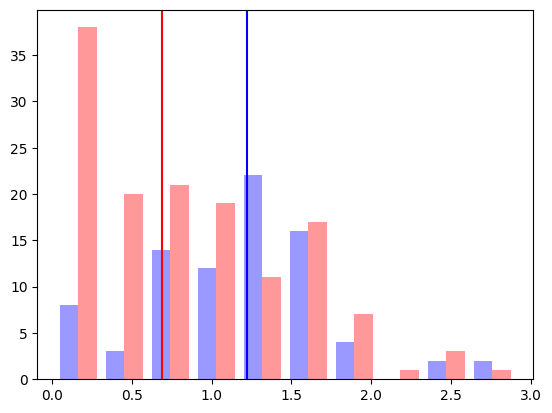

In [257]:
plt.hist([stance_len_L3,stance_len_R3, ], alpha =0.4, color = ['b', 'r'])
plt.axvline(np.median(stance_len_L3), color ='b')
plt.axvline(np.median(stance_len_R3), color ='r')

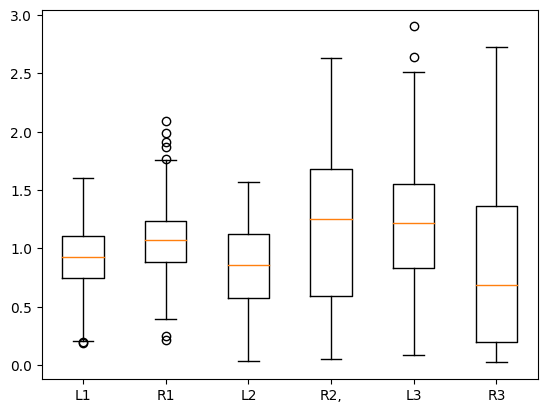

In [258]:
plt.boxplot([stance_len_L1, stance_len_R1,stance_len_L2, stance_len_R2,stance_len_L3, stance_len_R3], labels = ['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'])
plt.show()

# Step Period

In [259]:
# time between consecutive touchdowns

In [260]:
L1_SP = np.diff(np.array(L1_TD))
L2_SP = np.diff(np.array(L2_TD))
L3_SP = np.diff(np.array(L3_TD))

R1_SP = np.diff(np.array(R1_TD))
R2_SP = np.diff(np.array(R2_TD))
R3_SP = np.diff(np.array(R3_TD))

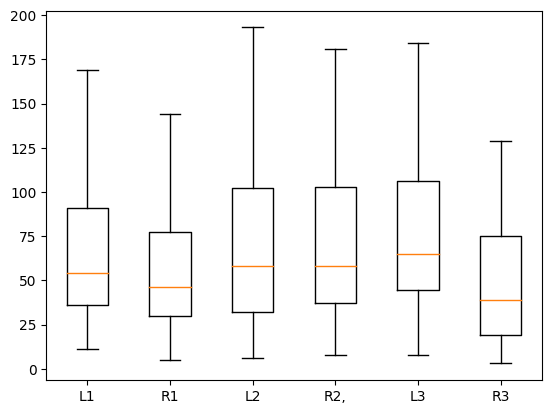

In [261]:
plt.boxplot([L1_SP, R1_SP,L2_SP, R2_SP,L3_SP, R3_SP], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

# Duty cycle

In [262]:
# fraction of step period spent in stance

In [263]:
L1_SD = []
for i in range (len(L1_LO)-1):
    temp_SD = L1_LO[i] - L1_TD[i] # SD = stance duration
    L1_SD.append (temp_SD)
    
L2_SD = []
for i in range (len(L2_LO)-1):
    temp_SD = L2_LO[i] - L2_TD[i] # SD = stance duration
    L2_SD.append (temp_SD)
    
L3_SD = []
for i in range (len(L3_LO)-1):
    temp_SD = L3_LO[i] - L3_TD[i] # SD = stance duration
    L3_SD.append (temp_SD)
    
R1_SD = []
for i in range (len(R1_LO)-1):
    temp_SD = R1_LO[i] - R1_TD[i] # SD = stance duration
    R1_SD.append (temp_SD)
    
R2_SD = []
for i in range (len(R2_LO)-1):
    temp_SD = R2_LO[i] - R2_TD[i] # SD = stance duration
    R2_SD.append (temp_SD)
    
R3_SD = []
for i in range (len(R3_LO)-1):
    temp_SD = R3_LO[i] - R3_TD[i] # SD = stance duration
    R3_SD.append (temp_SD)

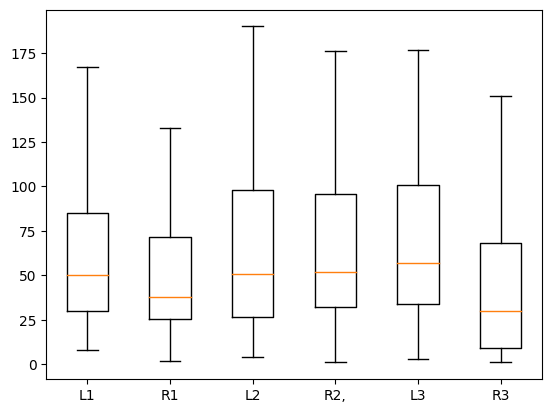

In [264]:
%matplotlib inline
plt.boxplot([L1_SD, R1_SD,L2_SD, R2_SD,L3_SD, R3_SD], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

In [265]:
L1_DC = []
for i in range(len(L1_SD)):
    temp_DC =L1_SD[i] / L1_SP[i]
    L1_DC.append(temp_DC)
    
L2_DC = []
for i in range(len(L2_SD)):
    temp_DC =L2_SD[i] / L2_SP[i] 
    L2_DC.append(temp_DC)
    
L3_DC = []
for i in range(len(L3_SD)):
    temp_DC =L3_SD[i] / L3_SP[i]
    L3_DC.append(temp_DC)
    
R1_DC = []
for i in range(len(R1_SD)):
    temp_DC =R1_SD[i] / R1_SP[i]
    R1_DC.append(temp_DC)
    
R2_DC = []
for i in range(len(R2_SD)):
    temp_DC= R2_SD[i] / R2_SP[i]
    R2_DC.append(temp_DC)
    
R3_DC = []
for i in range(len(R3_SD)):
    temp_DC =R3_SD[i] / R3_SP[i]
    R3_DC.append(temp_DC)

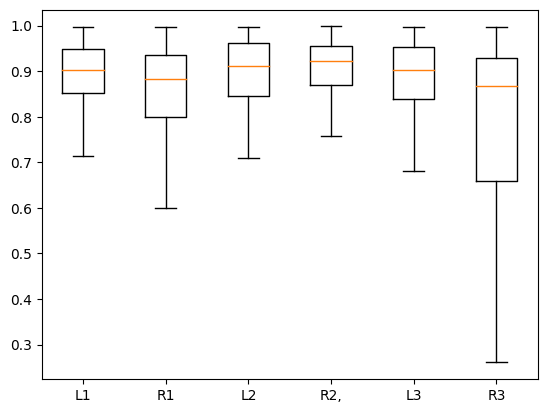

In [266]:
plt.boxplot([L1_DC, R1_DC,L2_DC, R2_DC,L3_DC, R3_DC], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

# Swing Duration

In [267]:
L1_swing = []
for i in range (len(L1_LO)-1):
    temp_sw = L1_SP[i] - L1_SD[i] # SD = stance duration
    L1_swing.append (temp_sw)
    
L2_swing = []
for i in range (len(L2_LO)-1):
    temp_sw = L2_SP[i] - L2_SD[i] # SD = stance duration
    L2_swing.append (temp_sw)
    
L3_swing = []
for i in range (len(L3_LO)-1):
    temp_sw = L3_SP[i] - L3_SD[i] # SD = stance duration
    L3_swing.append (temp_sw)
    
R1_swing = []
for i in range (len(R1_LO)-1):
    temp_sw = R1_SP[i] - R1_SD[i] # SD = stance duration
    R1_swing.append (temp_sw)
    
R2_swing = []
for i in range (len(R2_LO)-1):
    temp_sw = R2_SP[i] - R2_SD[i] # SD = stance duration
    R2_swing.append (temp_sw)
    
R3_swing = []
for i in range (len(R3_LO)-1):
    temp_sw = R3_SP[i] - R3_SD[i] # SD = stance duration
    R3_swing.append (temp_sw)

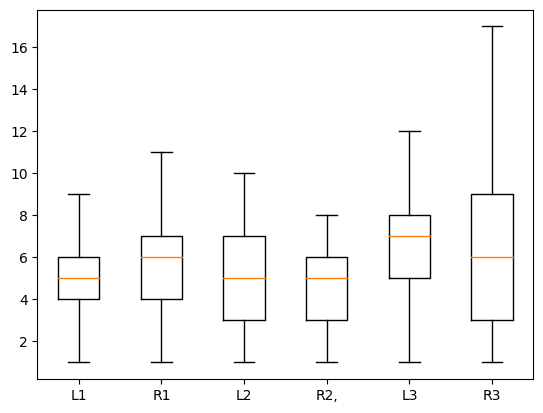

In [268]:
plt.boxplot([L1_swing, R1_swing,L2_swing, R2_swing,L3_swing, R3_swing], labels =['L1', 'R1', 'L2', 'R2,', 'L3', 'R3'], showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


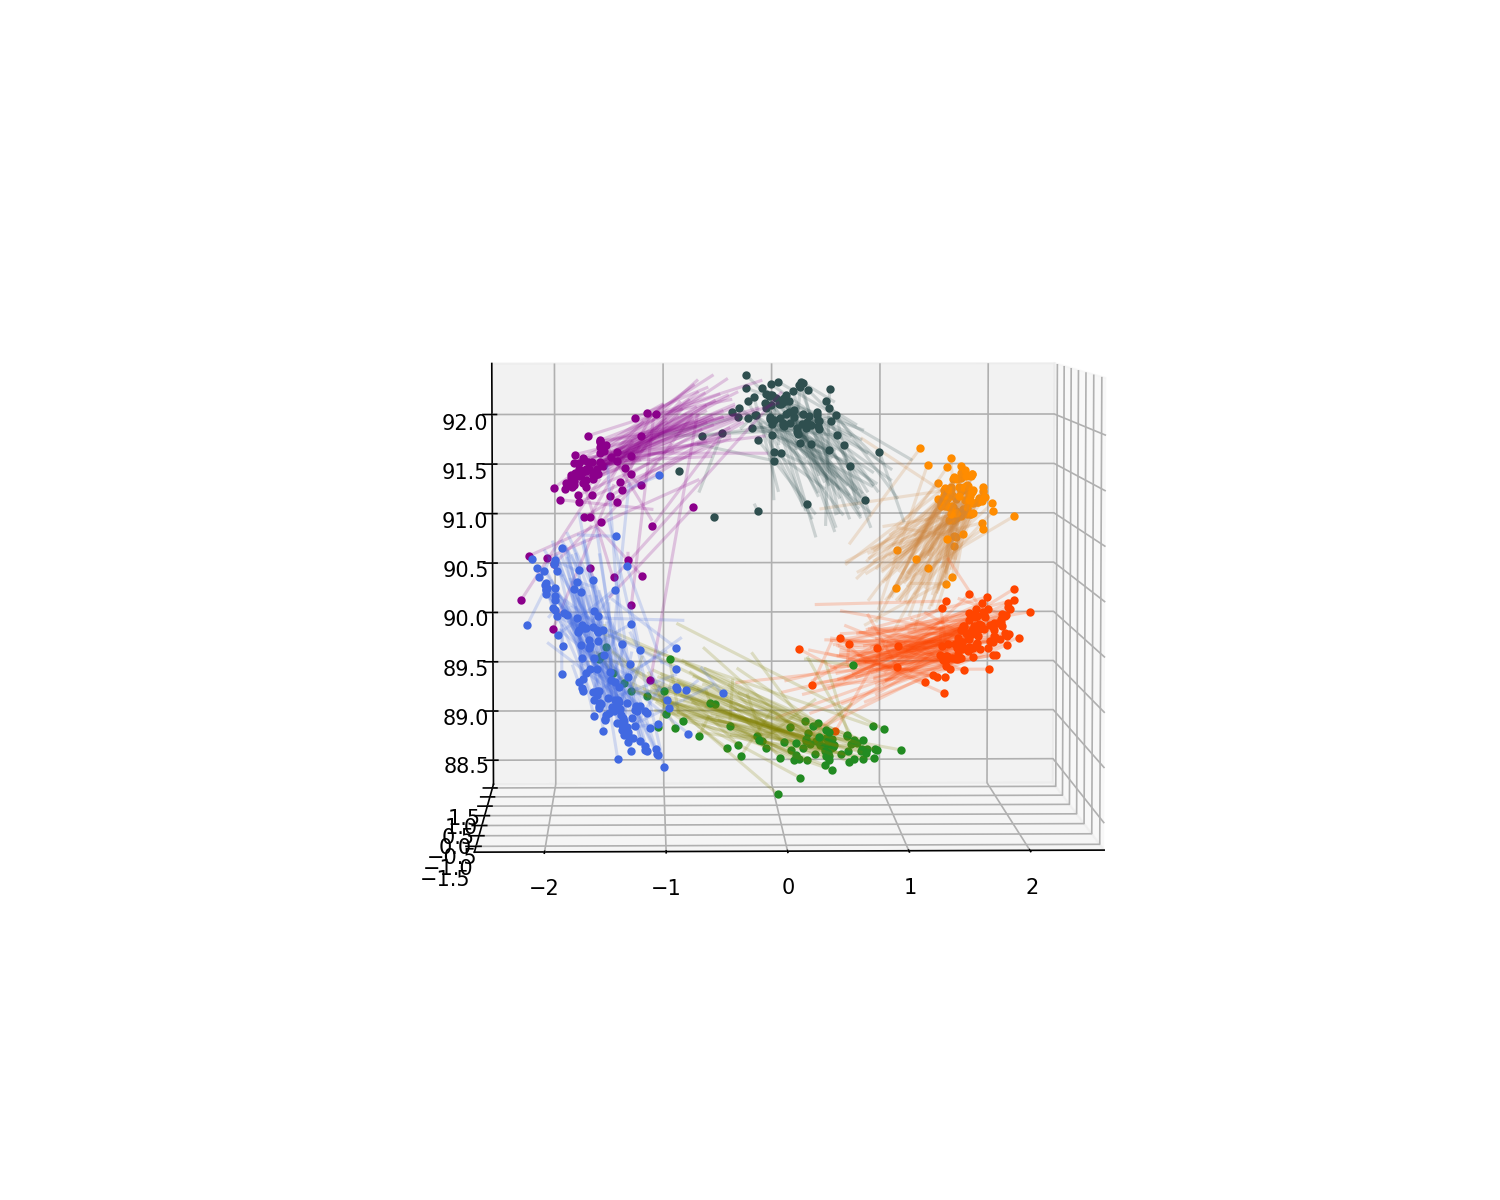

In [269]:
%matplotlib notebook
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection="3d")
for i in range (len(L1_TD_pos)):
    x, y, z = [L1_TD_pos.iloc[i,0], L1_LO_pos.iloc[i,0]], [L1_TD_pos.iloc[i,1], L1_LO_pos.iloc[i,1]], [L1_TD_pos.iloc[i,2], L1_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'peru' ,alpha = 0.2, linewidth=1.5)
    ax.plot3D(L1_TD_pos.iloc[i,0],L1_TD_pos.iloc[i,1],L1_TD_pos.iloc[i,2], '.', color = 'darkorange')
    
for i in range (len(R1_TD_pos)):
    x, y, z = [R1_TD_pos.iloc[i,0], R1_LO_pos.iloc[i,0]], [R1_TD_pos.iloc[i,1], R1_LO_pos.iloc[i,1]], [R1_TD_pos.iloc[i,2], R1_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'orangered' ,alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R1_TD_pos.iloc[i,0],R1_TD_pos.iloc[i,1],R1_TD_pos.iloc[i,2], '.', color = 'orangered')
    
for i in range (len(L2_TD_pos)):
    x, y, z = [L2_TD_pos.iloc[i,0], L2_LO_pos.iloc[i,0]], [L2_TD_pos.iloc[i,1], L2_LO_pos.iloc[i,1]], [L2_TD_pos.iloc[i,2], L2_LO_pos.iloc[i,2]]
    ax.plot(x, y, z,color = 'darkslategrey' ,  alpha = 0.2, linewidth=1.5)  
    ax.plot3D(L2_TD_pos.iloc[i,0],L2_TD_pos.iloc[i,1],L2_TD_pos.iloc[i,2], '.', color = 'darkslategrey')
    
for i in range (len(R2_TD_pos)):
    x, y, z = [R2_TD_pos.iloc[i,0], R2_LO_pos.iloc[i,0]], [R2_TD_pos.iloc[i,1], R2_LO_pos.iloc[i,1]], [R2_TD_pos.iloc[i,2], R2_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'olive' , alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R2_TD_pos.iloc[i,0],R2_TD_pos.iloc[i,1],R2_TD_pos.iloc[i,2], '.', color = 'forestgreen')
    
for i in range (len(L3_TD_pos)):
    x, y, z = [L3_TD_pos.iloc[i,0], L3_LO_pos.iloc[i,0]], [L3_TD_pos.iloc[i,1], L3_LO_pos.iloc[i,1]], [L3_TD_pos.iloc[i,2], L3_LO_pos.iloc[i,2]]
    ax.plot(x, y, z, color = 'darkmagenta', alpha = 0.2, linewidth=1.5) 
    ax.plot3D(L3_TD_pos.iloc[i,0],L3_TD_pos.iloc[i,1],L3_TD_pos.iloc[i,2], '.', color = 'darkmagenta')
    
for i in range (len(R3_TD_pos)):
    x, y, z = [R3_TD_pos.iloc[i,0], R3_LO_pos.iloc[i,0]], [R3_TD_pos.iloc[i,1], R3_LO_pos.iloc[i,1]], [R3_TD_pos.iloc[i,2], R3_LO_pos.iloc[i,2]]
    ax.plot(x, y, z,color = 'royalblue', alpha = 0.2, linewidth=1.5) 
    ax.plot3D(R3_TD_pos.iloc[i,0],R3_TD_pos.iloc[i,1],R3_TD_pos.iloc[i,2], '.', color = 'royalblue')
    
    
# x,y,z = [mean_coord.iloc[0,0] ,mean_coord.iloc[9,0]], [mean_coord.iloc[1,0] ,mean_coord.iloc[10,0]], [mean_coord.iloc[2,0] ,mean_coord.iloc[11,0]]
# ax.plot(x, y, z, color = 'k',linewidth=2)

# x,y,z = [mean_coord.iloc[3,0] ,mean_coord.iloc[12,0]], [mean_coord.iloc[4,0] ,mean_coord.iloc[13,0]], [mean_coord.iloc[5,0] ,mean_coord.iloc[14,0]]
# ax.plot(x, y, z, color = 'k',linewidth=2)

# x,y,z = [mean_coord.iloc[6,0] ,mean_coord.iloc[15,0]], [mean_coord.iloc[7,0] ,mean_coord.iloc[16,0]], [mean_coord.iloc[8,0] ,mean_coord.iloc[17,0]]
# ax.plot(x, y, z, color = 'k',linewidth=2)

# ax.plot3D(mean_coord.iloc[18,0],mean_coord.iloc[19,0],mean_coord.iloc[20,0], 'o', color = 'k')

plt.show()
